In [51]:
# Import useful modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec

# Not sure why I need this - do I?
# import matplotlib
# matplotlib.get_backend()
# print(matplotlib.rcParams['backend'])

In [52]:
# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

from session_directory import find_eraser_directory as get_dir
import er_plot_functions as erp
import Placefields as pf
import freezing_analysis as fa
import helpers 
import eraser_reference as err

# Project save directory here
print_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, plot example freezing cells from Marble07: 53, 67, 90, and 334

Next, plot example cell from ANI (Marble17 cell 144 from day 1) to show crappy stability along with Marble25 cell 375 day 1.

Assembling neuron map for base_day=1 and base_arena=Shock
Cannot find normal map - trying to run in reverse
Cannot find normal map - trying to run in reverse


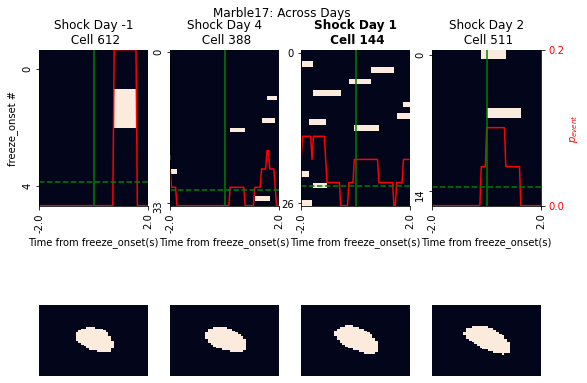

In [92]:
mmd = fa.MotionTuningMultiDay('Marble17', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(144, base_day=1, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble17_freeze_cell144_day1_across_days.jpg'), dpi=600)

Assembling neuron map for base_day=1 and base_arena=Shock
Cannot find normal map - trying to run in reverse
Cannot find normal map - trying to run in reverse


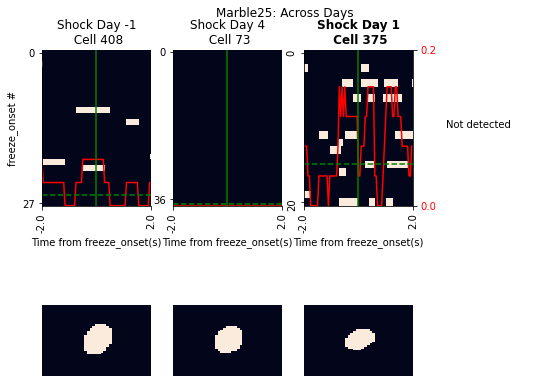

In [93]:
mmd = fa.MotionTuningMultiDay('Marble25', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(375, base_day=1, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble25_freeze_cell375_day1_across_days.jpg'), dpi=600)

Next plot example cell from Learner (Marble24 day 1 cell 36) to show a cell that comes online during 4 hour session and then stays stable through day 2. Also Marble 12 shock day 4 cell 128.

In [90]:
mmd = fa.MotionTuningMultiDay('Marble12', arena = 'Shock', days= [-1, 4, 1, 2])

Assembling neuron map for base_day=4 and base_arena=Shock
Cannot find normal map - trying to run in reverse


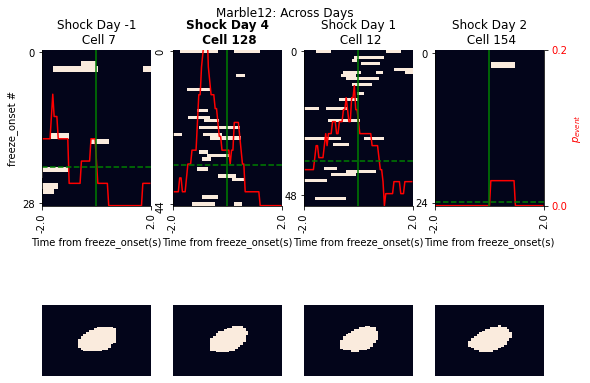

In [91]:
mmd.plot_raster_across_days(128, base_day=4, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble12_freeze_cell128_day4_across_days.jpg'), dpi=600)

In [79]:
mmd = fa.MotionTuningMultiDay('Marble24', arena = 'Shock', days= [-1, 4, 1, 2])

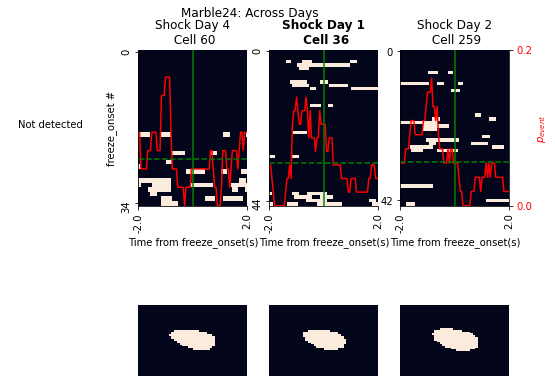

In [89]:
mmd.plot_raster_across_days(36, base_day=1, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble24_freeze_cell36_day1_across_days.jpg'), dpi=600)

In [ ]:
plt.gcf().savefig(os.path.join(print_dir, 'Marble24_freeze_cell36_day1_across_days.png'))

Last, show % of cells that are freezing cells across days

Plot off ratios across days

In [116]:
ctrl

,Exp Group,Group,Mouse,Base Day,Day,Off Ratio
0,Control,Learners,0,1.0,-1,0.142857
4,Control,Learners,1,1.0,-1,0.000000
8,Control,Learners,2,1.0,-1,0.555556
12,Control,Learners,3,1.0,-1,0.428571
0,Control,Nonlearners,0,1.0,-1,0.222222
4,Control,Nonlearners,1,1.0,-1,0.166667
8,Control,Nonlearners,2,1.0,-1,0.142857


2sided t-test Day -1: pval=0.07870843685639957 tstat=-1.957912624189833
2sided t-test Day 4: pval=0.04577683343757653 tstat=-2.2801140969562734
2sided t-test Day 2: pval=0.29187362819277507 tstat=-1.1126904527200732


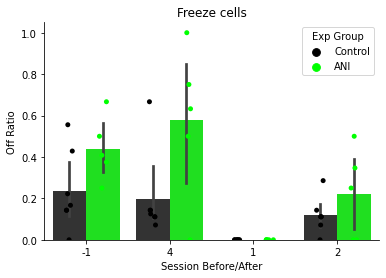

In [129]:
ts = fa.TuningStability('Shock', 'freeze_onset', 0.01) # Load in tuningstability object

#Set up color palette
pal_use = [(0, 0, 0), (0, 1, 0) ]
pal_use2 = [(0.2, 0.2, 0.2, 0.1), (0, 1, 0, 0.1) ]

base_day = 1
df = ts.off_ratio_to_df(base_day) # Make data into a dataframe
fig, ax = plt.subplots()
sns.stripplot(x='Day', y='Off Ratio', data=df, hue='Exp Group', dodge=True, ax=ax, palette=pal_use, 
              order=[-1, 4, 1, 2])
group_rows = df.loc[:, 'Exp Group'].copy()
group_rows_ = ["_" + row for row in df['Exp Group']]
df.loc[:, 'Exp Group'] = group_rows_
sns.barplot(x='Day', y='Off Ratio', data=df, hue='Exp Group', dodge=True, ax=ax, palette=pal_use2,
           order=[-1, 4, 1, 2])
sns.despine(ax=ax)
ax.set_title('Freeze cells')
ax.set_xlabel('Session Before/After')

df.loc[:, 'Exp Group'] = group_rows  # set labels back to normal

# Now do stats!
days_test = [-1, 4, 2] if base_day == 1 else [-1, 1, 2]
for day in days_test:
    ctrl = df[np.bitwise_and(df['Exp Group'] == 'Control', df['Day'] == day)]
    ani = df[np.bitwise_and(df['Exp Group'] == 'ANI', df['Day'] == day)]
    stat, pval = stats.ttest_ind(ctrl['Off Ratio'], ani['Off Ratio'])
    print('2sided t-test Day ' + str(day) + ': pval=' + str(pval) + ' tstat=' + str(stat))
    
fig.savefig(os.path.join(print_dir, 'Freeze_cell_off_ratio_day' + str(base_day) + 'base.jpg'), dpi=600)

In [ ]:
# Orlin note - show turnover for freeze cells on day -1 and Hopefully it isn't different between groups on day -2.

Plot across day stability of freeze neurons looking at peak event rate as your metric

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


2sided t-test Learners v Nonlearners day -1: pval=0.49059362446604526, tstat=0.6946982013246562
2sided t-test Learners v ANI day -1: pval=0.06769487609731598, tstat=-1.8631058041154074
2sided t-test Nonlearners v ANI day -1: pval=0.07205603935295252, tstat=-1.8476607343532276


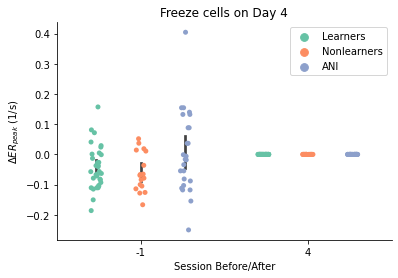

In [97]:
ts = fa.TuningStability('Shock', 'freeze_onset', 0.01) # Load in tuningstability object

# plotting info
metrics = ['locs', 'event_rates', 'pvals', 'corr_corrs', 'corr_pvals']
metric_labels_delta = [r'$\Delta_t$', r'$\Delta{ER}_{peak}$ (1/s)', 'p at peak', r'$\rho$', r'$p_{\rho}$']
metric_labels = [r'$t (s)$', r'$ER_{peak} (1/s)$', 'p at peak', r'$\rho$', r'$p_{\rho}$']

# First, get delta in event rates across days as a dataframe for day1 cells
metric_plot = 'event_rates'
delta = True
base_day = 4
days_plot = [-1, 4]
df_full = ts.metric_to_df(base_day, metric_plot, delta=delta)
df = df_full[[d in days_plot for d in df_full['Day']]]  # Keep only days indicated in days_plot
fig, ax = plt.subplots()
met_name = metric_plot if not delta else 'Delta' + metric_plot
sns.stripplot(x='Day', y=met_name, data=df, hue='Group', dodge=True, order=days_plot, 
              palette='Set2', ax=ax)

# This is the only easy way I could figure out to NOT duplicate labels in the legend
group_rows = df.loc[:, 'Group'].copy()
group_rows_ = ["_" + row for row in df['Group']]
df.loc[:, 'Group'] = group_rows_
sns.barplot(x='Day', y=met_name, data=df, hue='Group', dodge=True, order=days_plot, 
            palette='Set2', facecolor=(1,1,1,0), edgecolor=(1,1,1,0), ax=ax)
ax.legend(loc='upper right')
df.loc[:, 'Group'] = group_rows
sns.despine(ax=ax)

# Label y-axis nicely
met_ind = np.where([met == metric_plot for met in metrics])[0][0]  # find out index for which metric you are plotting
met_label = metric_labels_delta[met_ind] if delta else metric_labels[met_ind]
ax.set_ylabel(met_label)
ax.set_xlabel('Session Before/After')

# Label title
ax.set_title('Freeze cells on Day ' + str(base_day))

# now get stats and print out
for day in np.asarray(days_plot)[[base_day != d for d in days_plot]]:
    learners = df[np.bitwise_and(df['Group'] == 'Learners', df['Day'] == day)]
    nonlearners = df[np.bitwise_and(df['Group'] == 'Nonlearners', df['Day'] == day)]
    ani = df[np.bitwise_and(df['Group'] == 'ANI', df['Day'] == day)]
    stat, pval = stats.ttest_ind(learners[met_name], nonlearners[met_name], nan_policy='omit')
    print('2sided t-test Learners v Nonlearners day ' + str(day) + ': pval=' + str(pval) + ', tstat=' + str(stat))
    stat, pval = stats.ttest_ind(learners[met_name], ani[met_name], nan_policy='omit')
    print('2sided t-test Learners v ANI day ' + str(day) + ': pval=' + str(pval) + ', tstat=' + str(stat))
    stat, pval = stats.ttest_ind(nonlearners[met_name], ani[met_name], nan_policy='omit')
    print('2sided t-test Nonlearners v ANI day ' + str(day) + ': pval=' + str(pval) + ', tstat=' + str(stat))


fig.savefig(os.path.join(print_dir, 'freeze_cell_event_rate_across_days_base' + str(base_day) + 'notebook.pdf'))


In [70]:
np.asarray(days_plot)[[base_day != d for d in days_plot]]

array([-1,  1])